In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json

def get_relay_curve(In=1, order=4, C=1):
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10((I/In)-C)**order
        return 10**t
    return relay_curve


In [16]:
curve_u = np.genfromtxt('curve_u.csv', delimiter=',', dtype=float)
i_u = np.round(curve_u[:, 0],2)
t_u = np.round(curve_u[:, 1],2)
display(i_u, t_u)

curve_l = np.genfromtxt('curve_l.csv', delimiter=',', dtype=float)
i_l = np.round(curve_l[:, 0],2)
t_l = np.round(curve_l[:, 1],2)
display(i_l, t_l)

array([1.41, 1.49, 1.64, 1.86, 2.24, 2.86, 3.97, 6.03, 9.76])

array([5834.09, 3377.01, 2040.73, 1254.93,  797.67,  513.5 ,  329.84,
        219.26,  152.95])

array([1.12, 1.13, 1.13, 1.15, 1.17, 1.19, 1.22, 1.32, 1.56, 1.98, 2.66,
       3.64, 4.99, 6.65, 9.76])

array([5.65026e+03, 3.07989e+03, 1.82480e+03, 1.04023e+03, 5.89190e+02,
       3.54160e+02, 2.15430e+02, 1.22770e+02, 7.65000e+01, 4.96700e+01,
       3.21300e+01, 2.06800e+01, 1.32500e+01, 8.61000e+00, 5.17000e+00])

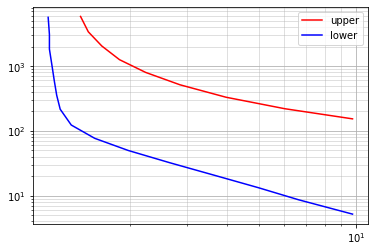

In [17]:
xdata = np.array(i_u)
ydata = np.array(t_u)
plt.plot(xdata, ydata, 'r-', label='upper')

xdata = np.array(i_l)
ydata = np.array(t_l)
plt.plot(xdata, ydata, 'b-', label='lower')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()

[2.74805, -0.81658, 0.099, 0.03864, -0.08808, 0.06705, 0.06965]

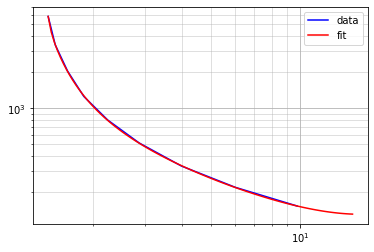

In [26]:
# Curve fitting upper

In = 1.35
order=6
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_u)
ydata = np.array(t_u)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))

[1.66262, -0.73914, -0.35666, -0.22558, 0.45166, -0.17353, 0.00672, -0.01319]

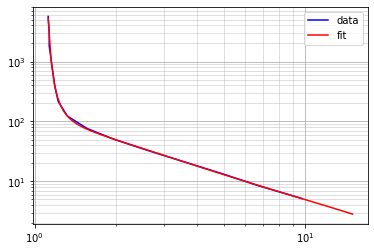

In [23]:
# Curve fitting lower

In=1.05
order=7
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_l)
ydata = np.array(t_l)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))